In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


In [77]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.rename(columns={'Trust (Government Corruption)':'Trust','Health (Life Expectancy)':'Health','Dystopia Residual':'Dystopia','Standard Error':'SE'},inplace=True)
df.head()

,Country,Region,Happiness Rank,Happiness Score,SE,Economy (GDP per Capita),Family,Health,Freedom,Trust,Generosity,Dystopia
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [78]:
df.shape

(158, 12)

In [79]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'SE',
       'Economy (GDP per Capita)', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia'],
      dtype='object')

In [80]:
df.isnull().sum().sum()

0

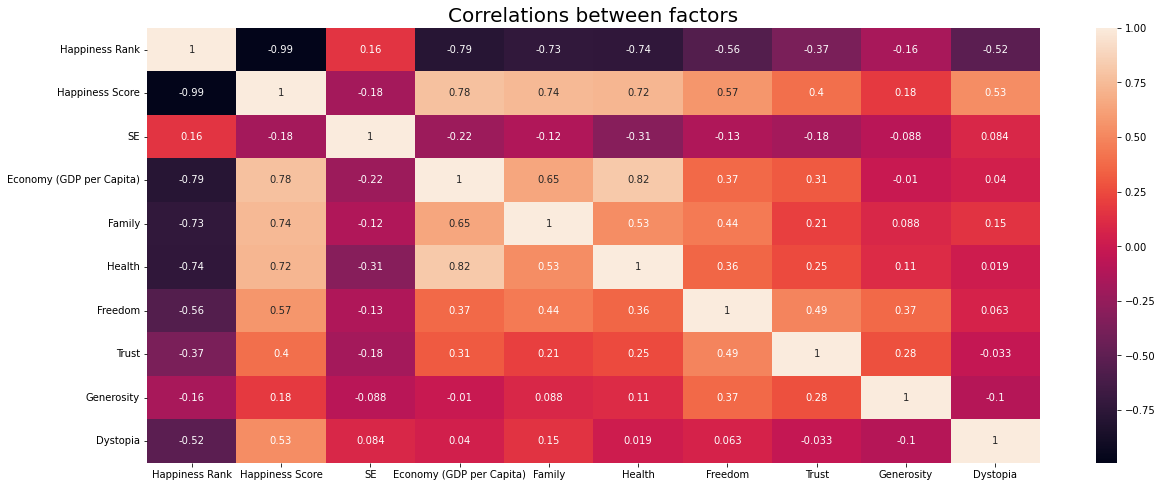

In [81]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlations between factors',fontsize=20)
plt.savefig('correlation_between _factors.jpg')
plt.show()

In [82]:
#Observation

#1.The high correlation between Economy(GDP per capita) and Happiness score
#2.The high correlation between Health and Family
#3.Weak correlation between Happiness score and Generosity


In [83]:
df.describe()

,Happiness Rank,Happiness Score,SE,Economy (GDP per Capita),Family,Health,Freedom,Trust,Generosity,Dystopia
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [84]:
df.dtypes

Country                      object
Region                       object
Happiness Rank                int64
Happiness Score             float64
SE                          float64
Economy (GDP per Capita)    float64
Family                      float64
Health                      float64
Freedom                     float64
Trust                       float64
Generosity                  float64
Dystopia                    float64
dtype: object

In [85]:
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,Country,Region,Happiness Rank,Happiness Score,SE,Economy (GDP per Capita),Family,Health,Freedom,Trust,Generosity,Dystopia
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [86]:
y = df['Happiness Score']
X = df.drop(columns=['Happiness Score'])

In [87]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [88]:
X

,Country,Region,Happiness Rank,SE,Economy (GDP per Capita),Family,Health,Freedom,Trust,Generosity,Dystopia
0,135.0,9.0,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Text(0.5, 0, 'Happiness score')

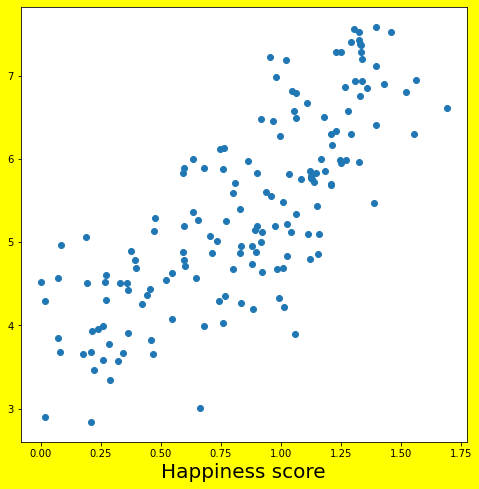

In [89]:
#lets visualize and see relationship btw economy of countries and happiness scorre

plt.figure(figsize=(8,8),facecolor='yellow')

plt.scatter(X['Economy (GDP per Capita)'],y)
plt.xlabel('Economy (GDP per Capita)',fontsize=20)
plt.xlabel('Happiness score',fontsize=20)

Text(0.5, 0, 'Happiness score')

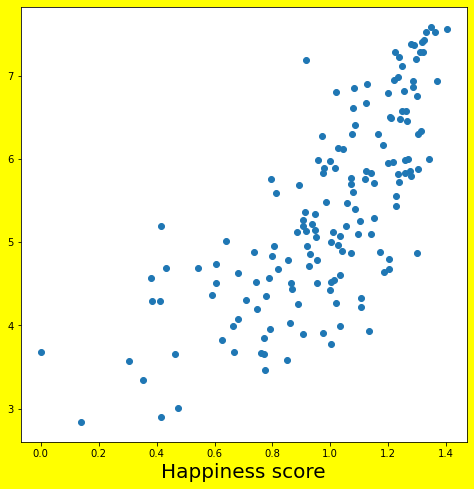

In [90]:
#lets visualize relation ship between family and happiness score

plt.figure(figsize=(8,8),facecolor='yellow')

plt.scatter(X['Family'],y)
plt.xlabel('Family',fontsize=20)
plt.xlabel('Happiness score',fontsize=20)

Text(0.5, 0, 'Happiness score')

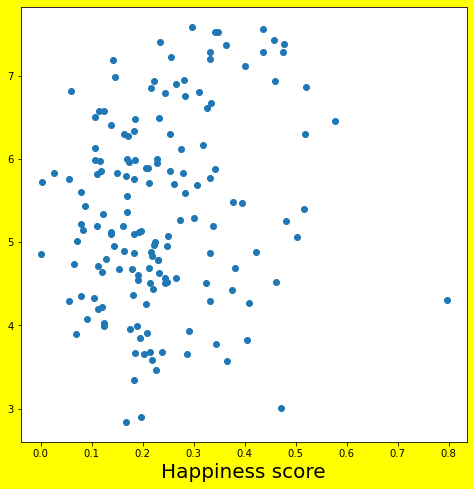

In [91]:
#lets visualize relationship btw generosity of countries and happiness score

plt.figure(figsize=(8,8),facecolor='yellow')

plt.scatter(X['Generosity'],y)
plt.xlabel('Generosity',fontsize=20)
plt.xlabel('Happiness score',fontsize=20)

Text(0.5, 0, 'Happiness score')

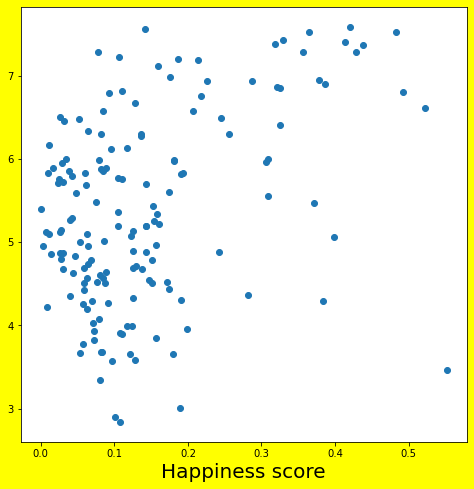

In [92]:
#lets visualize relationship between Trust on government and happiness score

plt.figure(figsize=(8,8),facecolor='yellow')

plt.scatter(X['Trust'],y)
plt.xlabel('Trust',fontsize=20)
plt.xlabel('Happiness score',fontsize=20)

Text(0.5, 0, 'Happiness score')

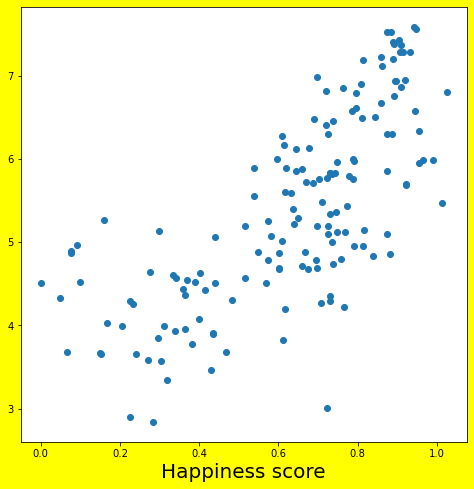

In [93]:
#lets visualize and analyse the relationship btw Health of people of countries and happiness score

plt.figure(figsize=(8,8),facecolor='yellow')

plt.scatter(X['Health'],y)
plt.xlabel('Health',fontsize=20)
plt.xlabel('Happiness score',fontsize=20)

Text(0.5, 0, 'Happiness score')

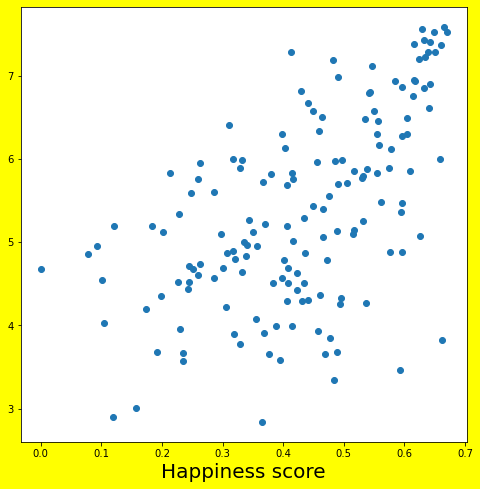

In [94]:
#lets visualize and analyse the relationship btw freedom of taking decisions and happiness score

plt.figure(figsize=(8,8),facecolor='yellow')

plt.scatter(X['Freedom'],y)
plt.xlabel('Freedom',fontsize=20)
plt.xlabel('Happiness score',fontsize=20)

In [95]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [96]:
X

,Country,Region,Happiness Rank,SE,Economy (GDP per Capita),Family,Health,Freedom,Trust,Generosity,Dystopia
0,135.0,9.0,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


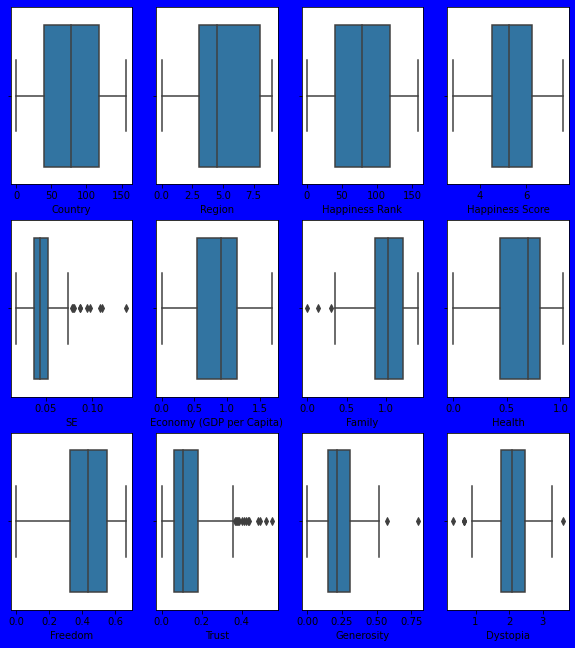

In [97]:
#lets visualize and analyse the data

plt.figure(figsize=(10,15),facecolor='blue')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [98]:
q1=df.quantile(0.25)

In [99]:
q3=df.quantile(0.75)

In [100]:
iqr=q3-q1

In [101]:
fam_low=(q1.Family -(1.5 * iqr.Family))
fam_low

0.32044875000000017

In [102]:
index = np.where(df['Family'] <fam_low)
index

(array([147, 152, 157], dtype=int64),)

In [103]:
df =df.drop(df.index[index])
df.shape

(155, 12)

In [104]:
df.reset_index()

,index,Country,Region,Happiness Rank,Happiness Score,SE,Economy (GDP per Capita),Family,Health,Freedom,Trust,Generosity,Dystopia
0,0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,151,20.0,8.0,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
151,153,118.0,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [105]:
trt_high=(q3.Trust + (1.5 * iqr.Trust))

In [106]:
index = np.where(df['Trust'] >trt_high)
index

(array([  0,   2,   3,   5,   7,   8,  16,  19,  23,  27,  71,  90, 129,
        151], dtype=int64),)

In [107]:
df = df.drop(df.index[index])
df.shape

(141, 12)

In [108]:
df.reset_index()

,index,Country,Region,Happiness Rank,Happiness Score,SE,Economy (GDP per Capita),Family,Health,Freedom,Trust,Generosity,Dystopia
0,1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,99.0,9.0,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,6.0,0.0,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,64.0,4.0,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,150,66.0,8.0,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
137,151,20.0,8.0,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
138,154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
139,155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [109]:
genr_high=(q3.Generosity + (1.5 * iqr.Generosity))

In [110]:
index = np.where(df['Generosity'] >genr_high)
index

(array([ 23, 116], dtype=int64),)

In [111]:
df = df.drop(df.index[index])
df.shape

(139, 12)

In [112]:
df.reset_index()

,index,Country,Region,Happiness Rank,Happiness Score,SE,Economy (GDP per Capita),Family,Health,Freedom,Trust,Generosity,Dystopia
0,1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,99.0,9.0,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,6.0,0.0,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,64.0,4.0,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,150,66.0,8.0,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
135,151,20.0,8.0,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
136,154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
137,155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [113]:
dys_low=(q1.Dystopia -(1.5 * iqr.Dystopia))
dys_low

0.7049024999999998

In [114]:
index = np.where(df['Dystopia']< dys_low)
index

(array([116, 137], dtype=int64),)

In [115]:
df =df.drop(df.index[index])
df.shape

(137, 12)

In [116]:
df.reset_index()

,index,Country,Region,Happiness Rank,Happiness Score,SE,Economy (GDP per Capita),Family,Health,Freedom,Trust,Generosity,Dystopia
0,1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,99.0,9.0,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,6.0,0.0,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,64.0,4.0,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,149,53.0,8.0,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
133,150,66.0,8.0,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
134,151,20.0,8.0,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
135,154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [117]:
dys_high=(q3.Dystopia +(1.5 * iqr.Dystopia))
dys_high

3.5169225

In [127]:
index = np.where(df['Dystopia'] >dys_high)
index

(array([], dtype=int64),)

In [128]:
df =df.drop(df.index[index])
df.shape

(0, 12)

In [129]:
df.reset_index()

,index,Country,Region,Happiness Rank,Happiness Score,SE,Economy (GDP per Capita),Family,Health,Freedom,Trust,Generosity,Dystopia


In [130]:
SE_high=(q3.SE+(1.5 * iqr.SE))
SE_high

0.07484874999999999

In [131]:
index = np.where(df['SE'] >dys_high)
index

(array([], dtype=int64),)

In [132]:
df =df.drop(df.index[index])
df.shape

(0, 12)

In [133]:
df.reset_index()

,index,Country,Region,Happiness Rank,Happiness Score,SE,Economy (GDP per Capita),Family,Health,Freedom,Trust,Generosity,Dystopia


In [134]:
#Data scaling Z=(X-mean)/std

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [146]:
X_scaled.shape[1]

11

In [147]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,1.082092,Country
1,1.455402,Region
2,76.549524,Happiness Rank
3,1.188841,SE
4,13.586284,Economy (GDP per Capita)
5,5.636951,Family
6,8.136093,Health
7,3.258351,Freedom
8,2.044527,Trust
9,2.124602,Generosity


In [178]:
X.drop(columns=['Happiness Rank','Dystopia'],inplace=True)
X

,Country,Region,SE,Economy (GDP per Capita),Family,Health,Freedom,Trust,Generosity
0,135.0,9.0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,58.0,9.0,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,37.0,9.0,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,105.0,9.0,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,24.0,5.0,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,13.0,8.0,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,136.0,4.0,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,21.0,8.0,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [179]:

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [180]:
X_scaled.shape[1]

9

In [137]:
#so,as we can see all values are less than 5 ..their is no multi collinearity.so,we can go ahead with fitting our data to model.before that let's split our data in test and training set. 

In [153]:
from sklearn.metrics import r2_score
regression=LinearRegression()

In [181]:
for i in range(0,100):
    x_train,x_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    regression.fit(x_train,y_train)
    pred_train = regression.predict(x_train)
    pred_test= regression.predict(x_test)
    print(f"At random state{i},the training accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is:-0.8053885199031978
At random state0,the testing accuracy is:-0.6504783013273122


At random state1,the training accuracy is:-0.7669380642504929
At random state1,the testing accuracy is:-0.8140595219084998


At random state2,the training accuracy is:-0.7827031150491528
At random state2,the testing accuracy is:-0.7511270956387673


At random state3,the training accuracy is:-0.7595753363892712
At random state3,the testing accuracy is:-0.7946696895183286


At random state4,the training accuracy is:-0.7588751992413045
At random state4,the testing accuracy is:-0.7854019231516789


At random state5,the training accuracy is:-0.793892582627317
At random state5,the testing accuracy is:-0.6887498237604485


At random state6,the training accuracy is:-0.7703386385498107
At random state6,the testing accuracy is:-0.7849512916151345


At random state7,the training accuracy is:-0.7945372658908816
At random state7,the testing accuracy is:-0.7030302542244216


A

In [182]:
x_train,x_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.25,random_state=52)


In [183]:
x_train.shape

(118, 9)

In [184]:
y_train.shape

(118,)

In [185]:
x_test.shape

(40, 9)

In [186]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [187]:
y_pred=regression.predict(x_test)
y_train.head()

51     5.889
66     5.689
79     5.212
41     6.130
150    3.655
Name: Happiness Score, dtype: float64

In [188]:
X

,Country,Region,SE,Economy (GDP per Capita),Family,Health,Freedom,Trust,Generosity
0,135.0,9.0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,58.0,9.0,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,37.0,9.0,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,105.0,9.0,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,24.0,5.0,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,13.0,8.0,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,136.0,4.0,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,21.0,8.0,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [189]:
#since we already fit the data,now we can transform the data
print('Happiness Score is:',regression.predict(scaler.transform([[141.0,8.0,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681]])))

Happiness Score is: [3.03346887]


In [190]:
#Adjusted R2 score
regression.score(x_train,y_train)

0.7513038939827852

In [191]:
regression.score(x_test,y_test)

0.8636840702435503

In [192]:
#lets plot and visualize
y_pred=regression.predict(x_test)
y_pred

array([4.21892635, 6.77373658, 4.02521687, 5.60978999, 6.0595048 ,
       2.75318723, 7.07151682, 7.05732655, 5.87777363, 4.22686615,
       5.94874208, 3.51828222, 4.57554766, 5.90347207, 7.12701766,
       5.97320632, 5.88733716, 6.0982386 , 6.11544394, 4.42857397,
       7.13284224, 5.6624277 , 6.17066679, 4.49229359, 6.85366183,
       4.17170423, 5.25200225, 5.74678213, 4.49893244, 4.26443079,
       4.66692907, 5.36946206, 5.29454797, 5.89182304, 4.73533922,
       4.65175552, 5.99206548, 4.36185216, 4.42226344, 5.17238755])

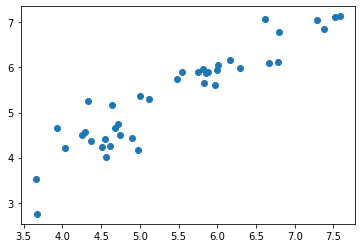

In [193]:
plt.scatter(y_test,y_pred)
plt.xlabel='Actual happiness score'
plt.ylabel='Predicted happiness score'
plt.title='Actual vs model Predicted '
plt.show()

In [195]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [196]:
 mean_squared_error(y_test,y_pred)

0.1614139953970479

In [197]:
mean_absolute_error(y_test,y_pred)

0.3134453434832454

In [198]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.4017636063620595

In [199]:
#regularization to chk whether model is overfitting or not

from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [200]:
lasscv = LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [201]:
alpha =lasscv.alpha_
alpha

0.005467997379075039

In [202]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.005467997379075039)

In [203]:
lasso_reg.score(x_test,y_test)

0.8634393230470253

In [204]:
#RidgeCV
ridgecv =RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [205]:

ridgecv.alpha_

0.09099999999999998

In [206]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [207]:
ridge_model.score(x_test,y_test)

0.8637624079815709

In [208]:
from sklearn.model_selection import cross_val_score

scr1=cross_val_score(ridge_model,X,y,cv=4)
print("cross validation score of linear regression model:",scr1.mean())

cross validation score of linear regression model: -5.28802972575752


In [209]:
scr1

array([-7.40537684, -2.54458229, -8.01913496, -3.18302482])

In [210]:
from sklearn.model_selection import cross_val_score

scr2=cross_val_score(ridge_model,X,y,cv=4)
print("cross validation score of ridge model:",scr2.mean())

cross validation score of ridge model: -5.28802972575752


In [211]:
from sklearn.model_selection import cross_val_score

scr3=cross_val_score(lasso_reg,X,y,cv=4)
print("cross validation score of lasso model:",scr3.mean())

cross validation score of lasso model: -5.5192960865051655


In [215]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters ={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
abc=GridSearchCV(rf,parameters)
abc.fit(x_train,y_train)
print(abc.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [216]:
rf=RandomForestRegressor(criterion= 'mse',max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_pred=rf.predict(x_test)
rfs=r2_score(y_test,y_pred)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

R2 score: 85.5666716483504
cross val score: -825.6681761044174


In [ ]:
#so,as we can see.ridge model and linear regression is giving 86% r2 ascore and after hyper parameter tuning model is giving 85% accuracy

In [ ]:
.....#..........................................................THANKS.......................................................................